## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.


*Atenção - Utilizar a base de dados em anexo que é a mesma base que utilizamos na atividade anterior! A base Boston, assim como para a primeira atividade foi descontinuada e não deve ser utilizada*

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [12]:
#Carregar base
housing_raw = pd.read_csv('housing.csv')

In [14]:
#Preparar base para aplicação no skl
housing = pd.get_dummies(housing_raw, columns=['ocean_proximity'])

In [20]:
#Definir 'X' - variáveis explicativas
X = housing.drop(columns = ['median_house_value']).copy()

#Definir 'y' - variável resposta
y = housing['median_house_value']

#Separar os dados em conjunto de validação e conjunto teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

#Gerar árvore
regr = DecisionTreeRegressor(max_depth=8)

#Treinar árvore
regr.fit(X_train, y_train)

# Fazer previsões sobre a base de treinamento
y_train_pred = regr.predict(X_train)

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [22]:
path = regr.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.00000000e+00, 6.06233850e+03, 2.00001077e+04, 2.79186047e+04,
        4.63956718e+04, 4.71658140e+04, 6.94238803e+04, 1.25688200e+05,
        1.52137765e+05, 1.63746202e+05, 1.66184808e+05, 2.29436764e+05,
        2.64599483e+05, 2.66336287e+05, 2.78174946e+05, 2.83256245e+05,
        3.07762446e+05, 3.11326150e+05, 3.39381998e+05, 3.40280718e+05,
        3.40745155e+05, 3.55976961e+05, 3.81749462e+05, 4.00617733e+05,
        4.21710795e+05, 4.49110634e+05, 4.62657911e+05, 5.18332173e+05,
        5.24553244e+05, 5.61409588e+05, 5.74340381e+05, 5.78863012e+05,
        6.31989666e+05, 6.74071221e+05, 7.02355816e+05, 7.11319011e+05,
        7.13272265e+05, 8.01816616e+05, 8.12213216e+05, 8.14862346e+05,
        8.58816079e+05, 8.61515491e+05, 8.88111442e+05, 8.91978360e+05,
        9.09448358e+05, 9.33375049e+05, 9.36666141e+05, 9.69283973e+05,
        9.71899279e+05, 9.96828055e+05, 1.02538847e+06, 1.07796065e+06,
        1.14059049e+06, 1.15854134e+06, 1.17127262

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [28]:
#Calcular da árvore em função de 'alpha'
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [34]:
train_scores = [mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs]

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

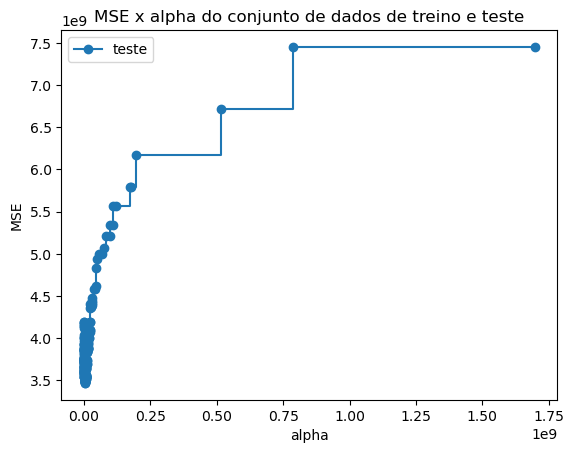

In [36]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [38]:
r_quad = regr.score(X_train, y_train)
r_quad

0.7606512682720336

### 7. Visualize esta árvore.

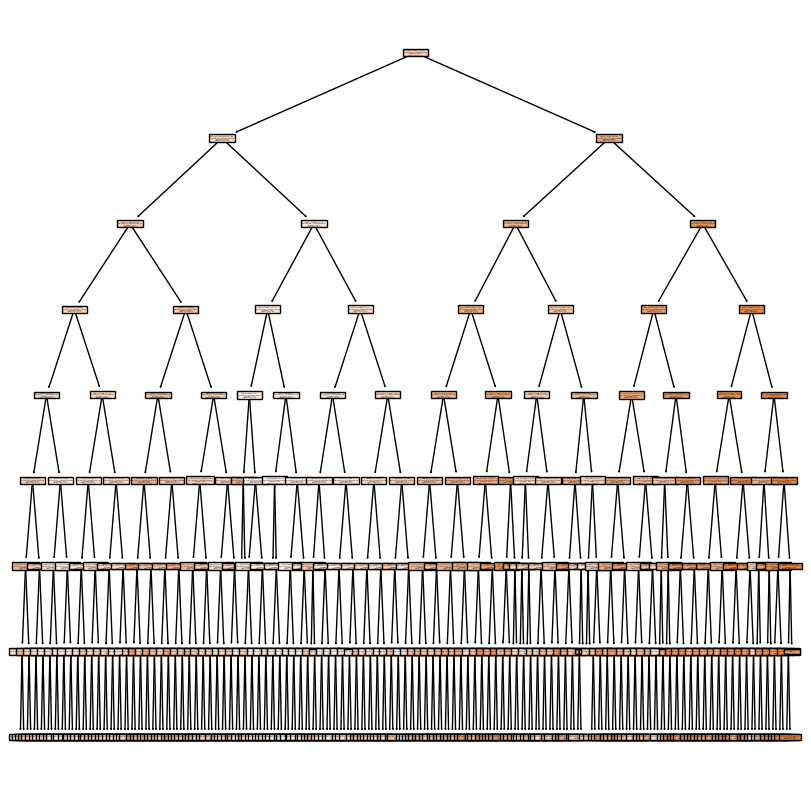

In [40]:
plt.rc('figure', figsize=(10, 10))
tp = tree.plot_tree(regr, 
                    feature_names=X.columns,  
                    filled=True) 